In [1]:
! pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asjalasad
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


100%|██████████| 179M/179M [00:00<00:00, 854MB/s] 


In [3]:
import os
from PIL import Image

# Correct path to your dataset directory
dataset_path = "/content/tomatoleaf/tomato"

# To store corrupt image paths
corrupt_images = []

# Traverse the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Check for file integrity
            except Exception as e:
                corrupt_images.append(file_path)

# Report results
print(f"\n🧪 Total corrupt/unreadable images: {len(corrupt_images)}\n")
for path in corrupt_images:
    print(path)



🧪 Total corrupt/unreadable images: 0



In [4]:
import os

# Root paths for train and val
dataset_root = "/content/tomatoleaf/tomato"
subdirs = ["train", "val"]

for subdir in subdirs:
    subdir_path = os.path.join(dataset_root, subdir)
    total_images = 0
    class_counts = {}

    for class_name in os.listdir(subdir_path):
        class_path = os.path.join(subdir_path, class_name)
        if os.path.isdir(class_path):
            image_count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])
            class_counts[class_name] = image_count
            total_images += image_count

    print(f"\n📂 {subdir.upper()} SET:")
    print(f"Total images: {total_images}")
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count} images")



📂 TRAIN SET:
Total images: 10000
Tomato___Bacterial_spot: 1000 images
Tomato___Early_blight: 1000 images
Tomato___Late_blight: 1000 images
Tomato___Leaf_Mold: 1000 images
Tomato___Septoria_leaf_spot: 1000 images
Tomato___Spider_mites Two-spotted_spider_mite: 1000 images
Tomato___Target_Spot: 1000 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1000 images
Tomato___Tomato_mosaic_virus: 1000 images
Tomato___healthy: 1000 images

📂 VAL SET:
Total images: 1000
Tomato___Bacterial_spot: 100 images
Tomato___Early_blight: 100 images
Tomato___Late_blight: 100 images
Tomato___Leaf_Mold: 100 images
Tomato___Septoria_leaf_spot: 100 images
Tomato___Spider_mites Two-spotted_spider_mite: 100 images
Tomato___Target_Spot: 100 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 100 images
Tomato___Tomato_mosaic_virus: 100 images
Tomato___healthy: 100 images


In [5]:
!pip install imagehash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.6 MB/s eta 0:00:00


In [6]:
import os
import imagehash
from PIL import Image
from collections import defaultdict

# Path to your dataset (train or val)
dataset_path = "/content/tomatoleaf/tomato"

# Collect hashes
hash_dict = defaultdict(list)

# Scan all images in all class folders (train and val)
for subset in ["train", "val"]:
    subset_path = os.path.join(dataset_path, subset)

    for class_folder in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_folder)

        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        with Image.open(img_path) as img:
                            hash_val = imagehash.average_hash(img)
                            hash_dict[str(hash_val)].append(img_path)
                    except Exception as e:
                        print(f"Error reading image: {img_path}")

# Detect and remove duplicates (keep one per hash group)
duplicates = []
for hash_val, paths in hash_dict.items():
    if len(paths) > 1:
        # Keep the first image, mark others as duplicates
        duplicates.extend(paths[1:])

print(f"\n🔍 Total duplicate images found: {len(duplicates)}")


🔍 Total duplicate images found: 228


📸 Found 147 duplicate pairs.


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Late_blight/d81682aa-746b-4e07-af2b-52ebb6f4c017___GHLB2 Leaf 102.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Late_blight/d6e6897a-5083-4914-9903-804c5684a956___GHLB2 Leaf 102.JPG


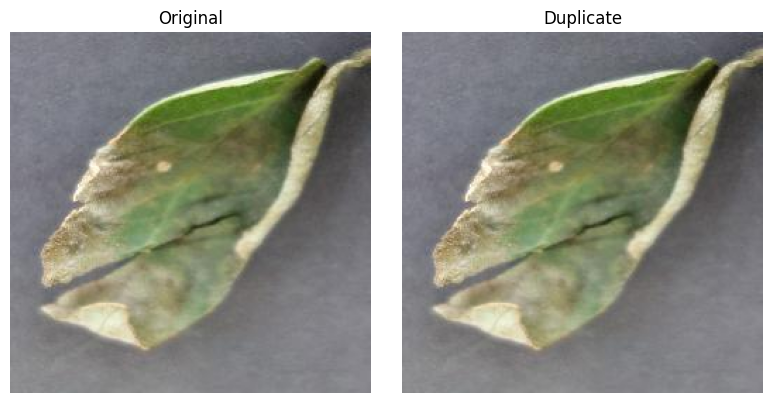


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Late_blight/98586693-fe1f-4ea0-8e27-4501b61cf09b___GHLB_PS Leaf 23.5 Day 13.jpg
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Late_blight/c1775bad-7c02-41fb-bb7d-f8df91d60ac3___GHLB_PS Leaf 23.5 Day 13.jpg


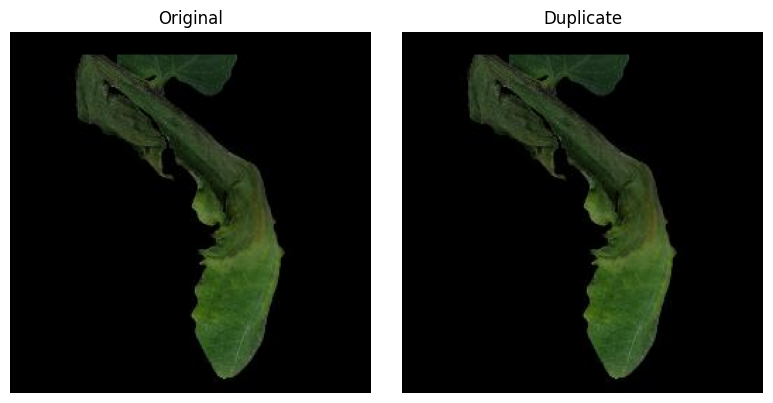


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Late_blight/e20107e7-137f-400e-817f-5dc4c58e5d70___GHLB2 Leaf 8677.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Late_blight/5688ea99-c949-41d0-bbab-9cbf0ffb8bcd___GHLB2 Leaf 8677.JPG


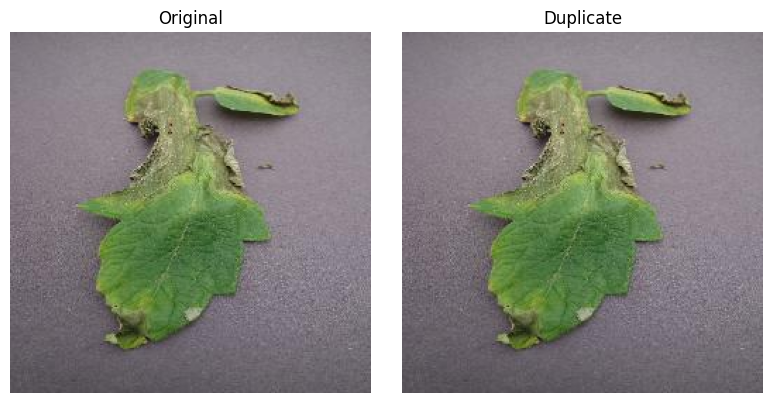


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Early_blight/Tomato___Early_blight_original_5c498e4e-e9b8-4380-828e-53dfd9beb683___RS_Erly.B 7788.JPG_28944ee8-a454-4d7c-bd46-a79cfa73f509.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Early_blight/Tomato___Early_blight_original_5c498e4e-e9b8-4380-828e-53dfd9beb683___RS_Erly.B 7788.JPG_1f08df9f-1b73-48a2-904d-9bf93e2e9dff.JPG


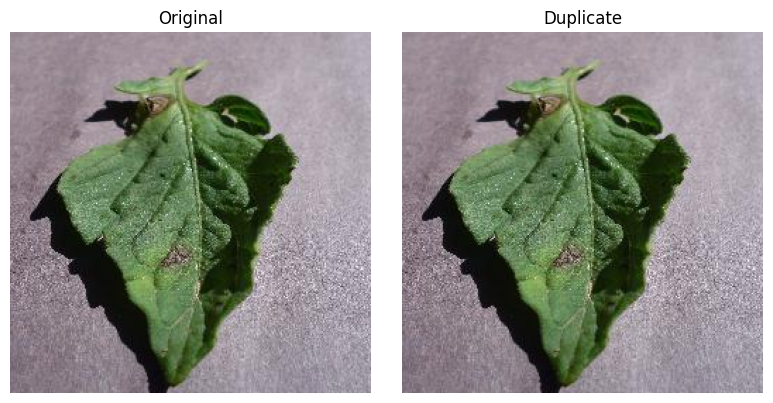


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___healthy/9662364c-aaba-45e3-b907-10792d60578c___GH_HL Leaf 220.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___healthy/d2ce7896-6fa4-45e6-96c5-d162da0e3e1c___GH_HL Leaf 220.JPG


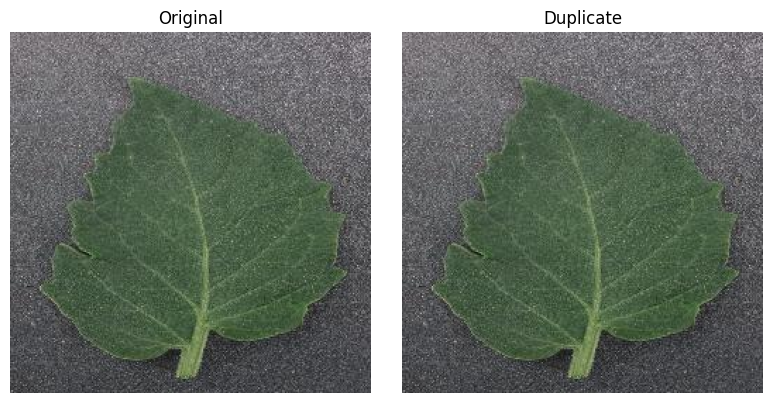


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___healthy/a5de43e7-fc2f-4a14-a8e6-c0f2f94c84f1___GH_HL Leaf 434.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___healthy/488feb1c-4b9f-44e7-8aa6-4103a9601f5f___GH_HL Leaf 434.JPG


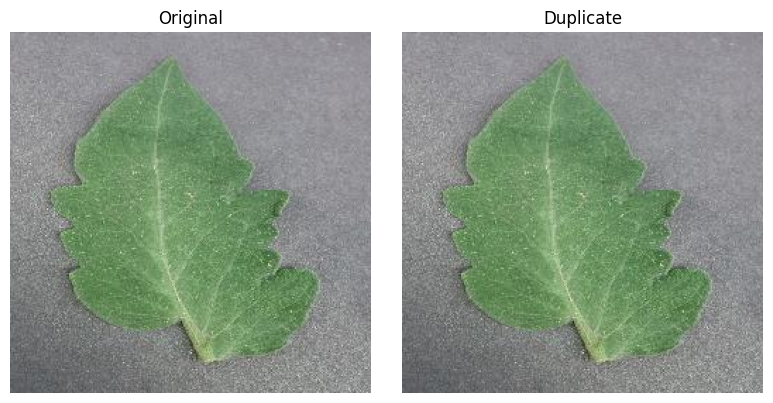


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___healthy/37203047-d8ba-43f7-b31e-d496c41c569c___GH_HL Leaf 389.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___healthy/505465db-407b-4e0a-8110-7479dad5261c___GH_HL Leaf 389.JPG


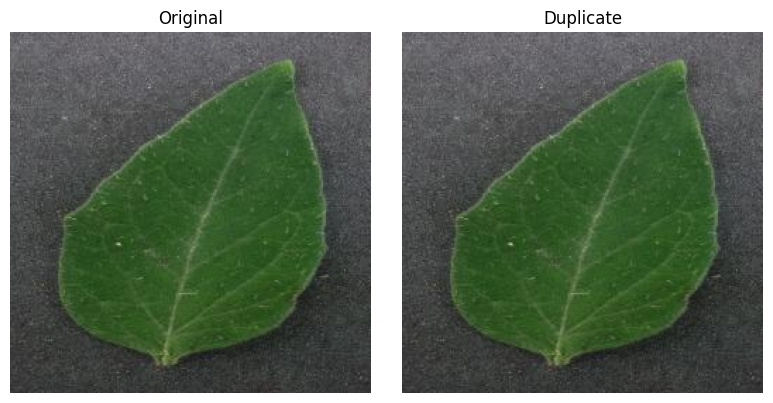


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_570486a0-abe0-4046-add9-14aab37de620___PSU_CG 2313.JPG_74480368-b5e6-4cb7-8537-7816f5a7a43c.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_570486a0-abe0-4046-add9-14aab37de620___PSU_CG 2313.JPG_739474da-f265-40a7-bbce-8a2b0511bbe3.JPG


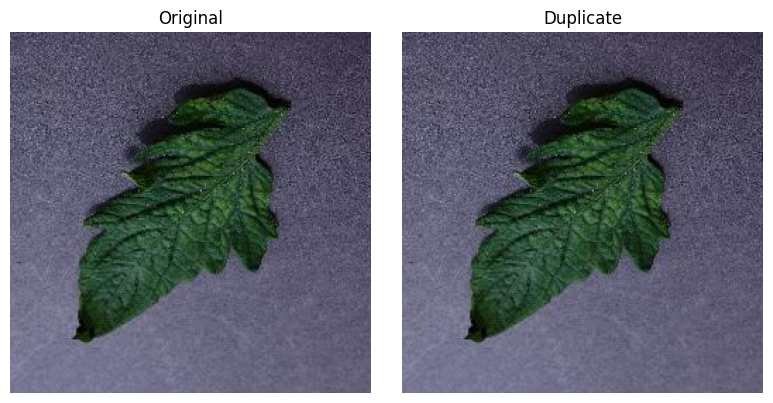


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_274c03c3-c69a-4182-ba3f-d6e93b2dea0b___PSU_CG 2349.JPG_a37d4d4a-9285-4d3f-a292-85df0b5db8f1.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_274c03c3-c69a-4182-ba3f-d6e93b2dea0b___PSU_CG 2349.JPG_e88559a9-94e3-4ef8-92bc-30a19c95ae10.JPG


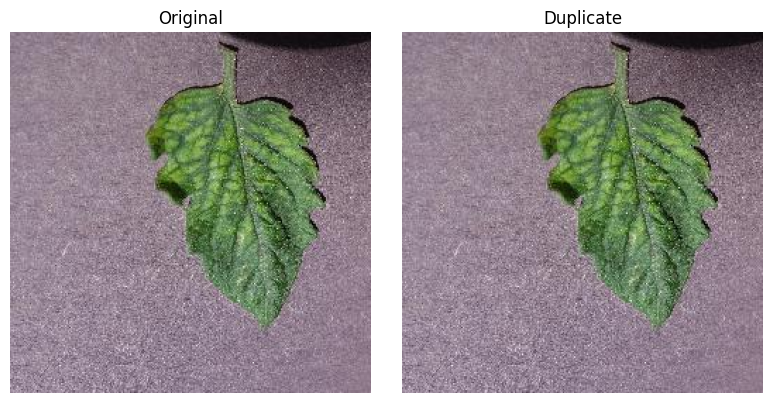


🖼️ Original: /content/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_a409fdf6-263d-4160-b007-52e531010def___PSU_CG 2291.JPG_9b78e9ea-ae52-48d1-b0eb-347433e07138.JPG
🔁 Duplicate: /content/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus/Tomato___Tomato_mosaic_virus_original_a409fdf6-263d-4160-b007-52e531010def___PSU_CG 2291.JPG_6f9cd49d-9a62-48dd-baeb-329d3966e7c6.JPG


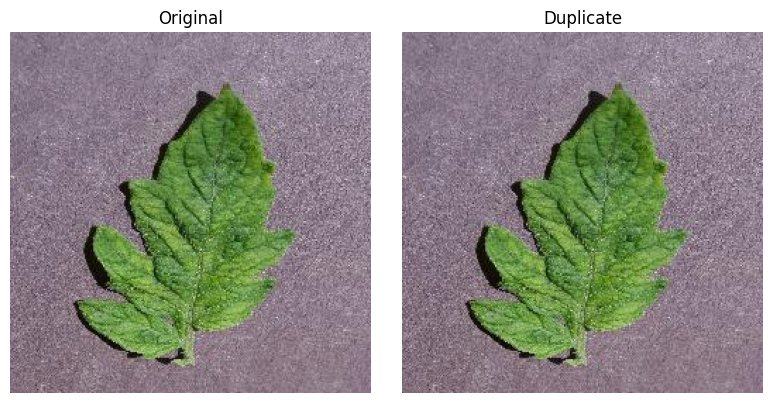

In [7]:
import os
import hashlib
from PIL import Image
import matplotlib.pyplot as plt

# 🔁 Update this with your dataset path
dataset_path = "/content/tomatoleaf/tomato"

# To store image hashes and their paths
image_hashes = {}
duplicates = []

# Step 1: Traverse the dataset and hash each image
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'rb') as f:
                    img_hash = hashlib.md5(f.read()).hexdigest()
                if img_hash in image_hashes:
                    duplicates.append((image_hashes[img_hash], file_path))
                else:
                    image_hashes[img_hash] = file_path
            except Exception as e:
                print(f"❌ Error with file: {file_path} - {e}")

# Step 2: Display some duplicate image pairs
print(f"📸 Found {len(duplicates)} duplicate pairs.\n")

def show_image_pair(img1_path, img2_path):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(Image.open(img1_path))
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(Image.open(img2_path))
    axs[1].set_title("Duplicate")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Show first 3 duplicate image pairs
for dup in duplicates[:10]:
    print(f"\n🖼️ Original: {dup[0]}\n🔁 Duplicate: {dup[1]}")
    show_image_pair(dup[0], dup[1])


In [10]:
# Optional: Remove duplicates (removing the second image in each tuple)
for dup_pair in duplicates:
    file_to_remove = dup_pair[1]  # Remove the second file in the pair
    os.remove(file_to_remove)
    print(f"🗑️ Removed: {file_to_remove}")


🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___Late_blight/d6e6897a-5083-4914-9903-804c5684a956___GHLB2 Leaf 102.JPG
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___Late_blight/c1775bad-7c02-41fb-bb7d-f8df91d60ac3___GHLB_PS Leaf 23.5 Day 13.jpg
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___Late_blight/5688ea99-c949-41d0-bbab-9cbf0ffb8bcd___GHLB2 Leaf 8677.JPG
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___Early_blight/Tomato___Early_blight_original_5c498e4e-e9b8-4380-828e-53dfd9beb683___RS_Erly.B 7788.JPG_1f08df9f-1b73-48a2-904d-9bf93e2e9dff.JPG
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___healthy/d2ce7896-6fa4-45e6-96c5-d162da0e3e1c___GH_HL Leaf 220.JPG
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___healthy/488feb1c-4b9f-44e7-8aa6-4103a9601f5f___GH_HL Leaf 434.JPG
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___healthy/505465db-407b-4e0a-8110-7479dad5261c___GH_HL Leaf 389.JPG
🗑️ Removed: /content/tomatoleaf/tomato/train/Tomato___Tomato

In [11]:
import os

# Root paths for train and val
dataset_root = "/content/tomatoleaf/tomato"
subdirs = ["train", "val"]

for subdir in subdirs:
    subdir_path = os.path.join(dataset_root, subdir)
    total_images = 0
    class_counts = {}

    for class_name in os.listdir(subdir_path):
        class_path = os.path.join(subdir_path, class_name)
        if os.path.isdir(class_path):
            image_count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])
            class_counts[class_name] = image_count
            total_images += image_count

    print(f"\n📂 {subdir.upper()} SET:")
    print(f"Total images: {total_images}")
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count} images")



📂 TRAIN SET:
Total images: 9897
Tomato___Bacterial_spot: 1000 images
Tomato___Early_blight: 999 images
Tomato___Late_blight: 997 images
Tomato___Leaf_Mold: 992 images
Tomato___Septoria_leaf_spot: 1000 images
Tomato___Spider_mites Two-spotted_spider_mite: 1000 images
Tomato___Target_Spot: 1000 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1000 images
Tomato___Tomato_mosaic_virus: 912 images
Tomato___healthy: 997 images

📂 VAL SET:
Total images: 956
Tomato___Bacterial_spot: 100 images
Tomato___Early_blight: 93 images
Tomato___Late_blight: 100 images
Tomato___Leaf_Mold: 95 images
Tomato___Septoria_leaf_spot: 98 images
Tomato___Spider_mites Two-spotted_spider_mite: 98 images
Tomato___Target_Spot: 100 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 100 images
Tomato___Tomato_mosaic_virus: 75 images
Tomato___healthy: 97 images


In [14]:
import os
import shutil

# Define CORRECT paths (adjust based on your actual structure)
train_dir = 'tomatoleaf/tomato/train'  # Path to train data
val_dir = 'tomatoleaf/tomato/val'      # Path to validation data
combined_dir = 'tomatoleaf/tomato/combined_data'  # New directory for combined data

# Create combined directory if it doesn't exist
os.makedirs(combined_dir, exist_ok=True)

# Function to copy files from source to destination, preserving class folders
def copy_files(source_dir, target_dir):
    for class_name in os.listdir(source_dir):
        class_source = os.path.join(source_dir, class_name)
        class_target = os.path.join(target_dir, class_name)

        os.makedirs(class_target, exist_ok=True)  # Create class folder in target

        for file in os.listdir(class_source):
            src_path = os.path.join(class_source, file)
            dst_path = os.path.join(class_target, file)
            shutil.copy(src_path, dst_path)

# Copy files from train and val to combined_dir
copy_files(train_dir, combined_dir)
copy_files(val_dir, combined_dir)

print(f"All files from 'train' and 'val' have been combined into '{combined_dir}'.")

All files from 'train' and 'val' have been combined into 'tomatoleaf/tomato/combined_data'.


In [16]:
import os
from PIL import Image

# Correct path to your dataset directory
dataset_path = "/content/tomato/combined_data"

# To store corrupt image paths
corrupt_images = []

# Traverse the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Check for file integrity
            except Exception as e:
                corrupt_images.append(file_path)

# Report results
print(f"\n🧪 Total corrupt/unreadable images: {len(corrupt_images)}\n")
for path in corrupt_images:
    print(path)



🧪 Total corrupt/unreadable images: 0



In [17]:
import os
from PIL import Image
from collections import defaultdict

def get_image_sizes_per_class(dataset_dir):
    size_dict = defaultdict(set)

    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    size_dict[class_name].add(img.size)
            except Exception:
                continue

    for cls, sizes in size_dict.items():
        print(f"📂 Class: {cls}")
        for s in sizes:
            print(f"   ➤ Image Size: {s}")
        print()

# Example usage:
get_image_sizes_per_class('/content/tomato/combined_data')


📂 Class: Tomato___Septoria_leaf_spot
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Late_blight
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Early_blight
   ➤ Image Size: (256, 256)

📂 Class: Tomato___healthy
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Bacterial_spot
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Tomato_mosaic_virus
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Target_Spot
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Leaf_Mold
   ➤ Image Size: (256, 256)

📂 Class: Tomato___Spider_mites Two-spotted_spider_mite
   ➤ Image Size: (256, 256)



In [18]:
import os

image_root = "//content/tomato/combined_data"
image_files = []

for root, _, files in os.walk(image_root):
    for file in files:
        image_files.append(os.path.join(root, file))

print(f"Total files found: {len(image_files)}")
for img in image_files[:10]:  # show first 10 files
    print(img)


Total files found: 9897
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/3823a859-7570-4196-abf7-64f102d55f8d___Matt.S_CG 7740.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/da74ea57-f6f1-4adb-8bcd-1a72c3f91bcf___Matt.S_CG 0920.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/be419ce9-4bc5-42fb-87c3-ebabb27321af___JR_Sept.L.S 2638.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/647b98f0-0a93-4c39-8b5e-cf549f5117e6___Matt.S_CG 6869.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/fac48215-87c9-4e61-a64e-e6dd868ebc19___Matt.S_CG 7714.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/edba6e66-629b-4988-8921-9a4e87701a54___JR_Sept.L.S 2464.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/cbc521e4-3e95-4c0d-a806-56519afd72df___JR_Sept.L.S 8561.JPG
//content/tomato/combined_data/Tomato___Septoria_leaf_spot/cbb28fe8-58fe-49e4-ad76-efc3826e0049___Keller.St_CG 1791.JPG
//content/tomato/combined_data/

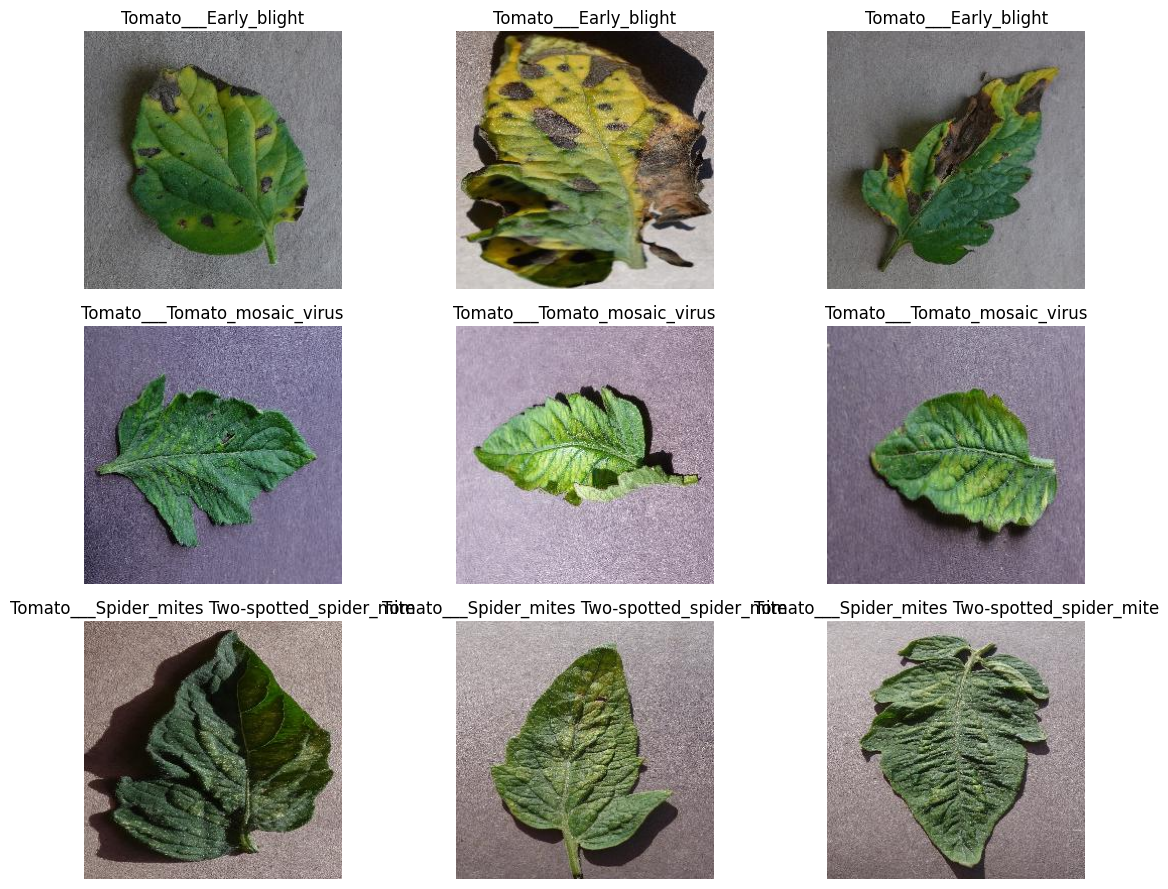

In [19]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Updated root directory path
dataset_dir = "/content/tomato/combined_data"

# Accepted image extensions (case-insensitive)
valid_exts = ('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')

# Dictionary to store class-wise images
class_images = {}

# Recursively find images
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(valid_exts):
            class_name = os.path.basename(root)
            class_images.setdefault(class_name, []).append(os.path.join(root, file))

# Now display 3 random images from 3 random classes
plt.figure(figsize=(12, 9))
sampled_classes = random.sample(list(class_images.keys()), 3)

for idx, class_name in enumerate(sampled_classes):
    if len(class_images[class_name]) >= 3:
        for i in range(3):
            plt.subplot(3, 3, idx*3 + i + 1)
            img_path = random.choice(class_images[class_name])
            try:
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
            except Exception as e:
                print(f"Could not load image {img_path}: {e}")

plt.tight_layout()
plt.show()


In [20]:
import os
from PIL import Image
import numpy as np

base_dir = "/content/tomato/combined_data"

class_stats = {}

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            class_name = os.path.basename(os.path.dirname(os.path.join(root, file)))
            img_path = os.path.join(root, file)

            if class_name not in class_stats:
                class_stats[class_name] = {
                    "shapes": set(),
                    "pixel_min": [],
                    "pixel_max": [],
                }

            try:
                with Image.open(img_path) as img:
                    img = img.convert("RGB")
                    img_array = np.array(img)
                    class_stats[class_name]["shapes"].add(img_array.shape)
                    class_stats[class_name]["pixel_min"].append(img_array.min())
                    class_stats[class_name]["pixel_max"].append(img_array.max())
            except:
                continue

# Display stats
for class_name, stats in class_stats.items():
    print(f"📂 Class: {class_name}")
    if stats["pixel_min"] and stats["pixel_max"]:
        print(f"   ➤ Unique Image Shapes: {stats['shapes']}")
        print(f"   ➤ Pixel Intensity Range: {min(stats['pixel_min'])}–{max(stats['pixel_max'])}\n")
    else:
        print("   ⚠️ No valid images found.\n")


📂 Class: Tomato___Septoria_leaf_spot
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Late_blight
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Early_blight
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___healthy
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Bacterial_spot
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Tomato_mosaic_virus
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Target_Spot
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Class: Tomato___Leaf_Mold
   ➤ Unique Image Shapes: {(256, 256, 3)}
   ➤ Pixel Intensity Range: 0–255

📂 Clas

In [24]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

folder_path = "/content/tomato/combined_data"  # ✅ directory path
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

# Show and normalize first 5 images
for i, file_name in enumerate(image_files[:5]):
    img_path = os.path.join(folder_path, file_name)
    try:
        with Image.open(img_path) as img:
            img = img.convert("RGB")
            img_array = np.array(img) / 255.0  # ✅ normalize to [0, 1]

            # Plot image
            plt.figure(figsize=(2, 2))
            plt.imshow(img_array)
            plt.title(f"Normalized Image {i+1}")
            plt.axis('off')
            plt.show()
    except Exception as e:
        print(f"Error with {img_path}: {e}")


In [25]:
import os
import numpy as np
from PIL import Image

folder_path = "/content/tomato/combined_data"
image_paths = []

# Recursively gather image paths
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(root, file))

unnormalized_images = []

for img_path in image_paths:
    try:
        with Image.open(img_path) as img:
            img = img.convert("RGB")
            img_array = np.array(img)

            if img_array.max() > 1.0:  # Not normalized
                unnormalized_images.append(img_path)
    except Exception as e:
        print(f"❌ Error loading {img_path}: {e}")

# Result
if unnormalized_images:
    print(f"❗ {len(unnormalized_images)} images are not normalized.")
    for path in unnormalized_images[:5]:
        print("Unnormalized:", path)
else:
    print("✅ All images are normalized (values ≤ 1.0).")


❗ 9897 images are not normalized.
Unnormalized: /content/tomato/combined_data/Tomato___Septoria_leaf_spot/3823a859-7570-4196-abf7-64f102d55f8d___Matt.S_CG 7740.JPG
Unnormalized: /content/tomato/combined_data/Tomato___Septoria_leaf_spot/da74ea57-f6f1-4adb-8bcd-1a72c3f91bcf___Matt.S_CG 0920.JPG
Unnormalized: /content/tomato/combined_data/Tomato___Septoria_leaf_spot/be419ce9-4bc5-42fb-87c3-ebabb27321af___JR_Sept.L.S 2638.JPG
Unnormalized: /content/tomato/combined_data/Tomato___Septoria_leaf_spot/647b98f0-0a93-4c39-8b5e-cf549f5117e6___Matt.S_CG 6869.JPG
Unnormalized: /content/tomato/combined_data/Tomato___Septoria_leaf_spot/fac48215-87c9-4e61-a64e-e6dd868ebc19___Matt.S_CG 7714.JPG


In [27]:
import os
import numpy as np
from PIL import Image

def normalize_and_save_to_combined(root_dir, combined_dir="/content/tomato/combined_data"):
    # Ensure combined_data directory exists
    os.makedirs(combined_dir, exist_ok=True)

    for class_name in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # Create corresponding class directory in combined_data
        combined_class_path = os.path.join(combined_dir, class_name)
        os.makedirs(combined_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Skip if already processed (.npy file)
            if img_name.endswith('.npy'):
                continue

            try:
                with Image.open(img_path) as img:
                    img = img.convert("RGB")
                    img = img.resize((128, 128))
                    img_array = np.array(img) / 255.0

                    # Save with original name but .npy extension
                    base_name = os.path.splitext(img_name)[0]
                    output_path = os.path.join(combined_class_path, f"{base_name}.npy")

                    # Skip if file already exists
                    if not os.path.exists(output_path):
                        np.save(output_path, img_array)
            except Exception as e:
                print(f"❌ Failed: {img_path} — {e}")

print("✅ All images normalized and saved to /content/tomato/combined_data")

✅ All images normalized and saved to /content/tomato/combined_data


In [28]:
import os
import numpy as np
from PIL import Image

folder_path = "/content/tomatoleaf/normalized"
image_paths = []

# Recursively gather image paths
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(root, file))

unnormalized_images = []

for img_path in image_paths:
    try:
        with Image.open(img_path) as img:
            img = img.convert("RGB")
            img_array = np.array(img)

            if img_array.max() > 1.0:  # Not normalized
                unnormalized_images.append(img_path)
    except Exception as e:
        print(f"❌ Error loading {img_path}: {e}")

# Result
if unnormalized_images:
    print(f"❗ {len(unnormalized_images)} images are not normalized.")
    for path in unnormalized_images[:5]:
        print("Unnormalized:", path)
else:
    print("✅ All images are normalized (values ≤ 1.0).")


✅ All images are normalized (values ≤ 1.0).


In [34]:
import os
import shutil
import random

def split_and_copy_images(source_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.npy'))]
        random.shuffle(images)

        total = len(images)
        train_end = int(train_ratio * total)
        val_end = train_end + int(val_ratio * total)

        for idx, image in enumerate(images):
            if idx < train_end:
                split = 'train'
            elif idx < val_end:
                split = 'val'
            else:
                split = 'test'

            # Create subfolder for class inside split
            dest_class_dir = os.path.join(output_dir, split, class_name)
            os.makedirs(dest_class_dir, exist_ok=True)

            src_path = os.path.join(class_path, image)
            dst_path = os.path.join(dest_class_dir, image)

            shutil.copy2(src_path, dst_path)

    print(f"✅ Dataset split into {output_dir}/train, val, test folders.")

# Run the function
split_and_copy_images(
    source_dir="/content/tomato/combined_data",       # Your original dataset path
    output_dir="/content/tomato_split"                # New split dataset path
)


✅ Dataset split into /content/tomato_split/train, val, test folders.


In [32]:
import os
from collections import defaultdict

folder = "/content/tomato/combined_data"
file_types = defaultdict(int)

for class_name in os.listdir(folder):
    class_path = os.path.join(folder, class_name)
    if not os.path.isdir(class_path):
        continue

    for file in os.listdir(class_path):
        ext = os.path.splitext(file)[1].lower()
        file_types[ext] += 1

print("📦 File type counts in combined_data:")
for ext, count in file_types.items():
    print(f"{ext or '[no extension]'}: {count}")


📦 File type counts in combined_data:
.jpg: 9896
.jpeg: 1


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Correct paths
train_path = "/content/tomato_split/train"
val_path = "/content/tomato_split/val"
test_path = "/content/tomato_split/test"

# ✅ Normalize images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (128, 128)
batch_size = 32

# ✅ Load train, val, and test data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important if you plan to evaluate or make predictions
)


Found 6925 images belonging to 10 classes.
Found 1481 images belonging to 10 classes.
Found 1491 images belonging to 10 classes.


In [43]:
# Step 1: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Automatically adjusts to your number of classes
])

# Step 2: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 3: Train the model
history = model.fit(
    train_generator,
    epochs=20,  # You can change this depending on overfitting/underfitting
    validation_data=val_generator
)


Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.2687 - loss: 2.0126 - val_accuracy: 0.6455 - val_loss: 0.9626
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.6478 - loss: 1.0392 - val_accuracy: 0.7664 - val_loss: 0.6602
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.7332 - loss: 0.7632 - val_accuracy: 0.7745 - val_loss: 0.6708
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.7591 - loss: 0.6894 - val_accuracy: 0.8082 - val_loss: 0.5384
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8096 - loss: 0.5352 - val_accuracy: 0.8190 - val_loss: 0.5219
Epoch 6/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.8271 - loss: 0.4787 - val_accuracy: 0.8130 - val_loss: 0.5189
Epoch 7/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.8603 - loss: 0.4020 - val_accuracy: 0.8731 - val_loss: 0.3679
Epoch 8/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.8780 - loss: 0.3456 - val_accu

In [50]:
# If you created test data using ImageDataGenerator:
loss, accuracy = model.evaluate(test_generator)


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 313ms/step - accuracy: 0.8910 - loss: 0.4998


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/tomato_split/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # or 'binary' depending on your problem
    shuffle=False
)


Found 1491 images belonging to 10 classes.


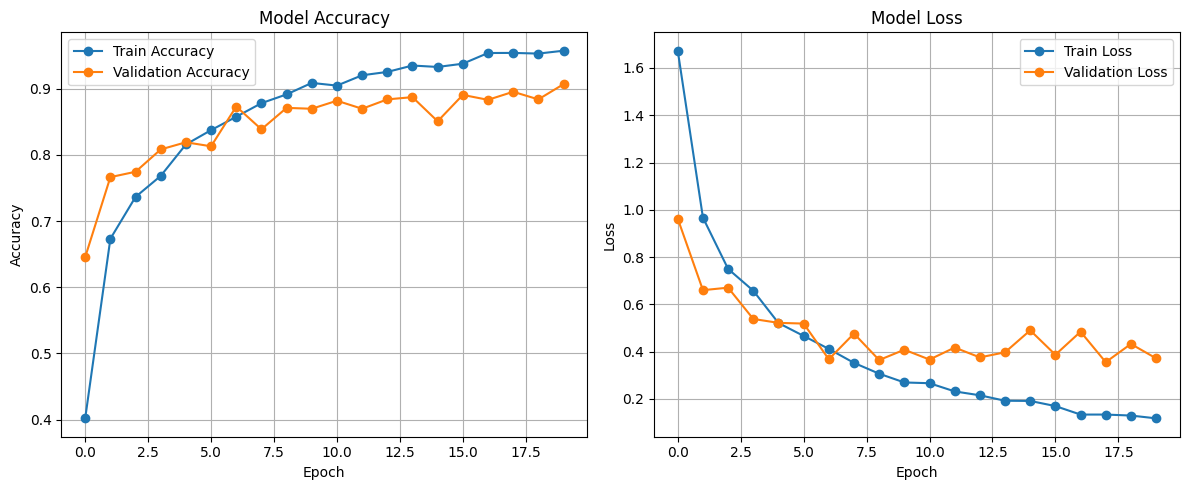

In [45]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/tomato_split/test',       # 🔁 Replace with actual path
    target_size=(128, 128),       # Same size used during training
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 1491 images belonging to 10 classes.


In [52]:
import numpy as np

pred_probs = model.predict(test_generator)
predicted_classes = np.argmax(pred_probs, axis=1)
true_classes = test_generator.classes


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step


In [53]:
class_labels = list(test_generator.class_indices.keys())


In [54]:
import pandas as pd

results = pd.DataFrame({
    'Filename': test_generator.filenames,
    'Actual Class': [class_labels[i] for i in true_classes],
    'Predicted Class': [class_labels[i] for i in predicted_classes]
})

print(results.head())  # Show first few predictions


                                            Filename             Actual Class  \
0  Tomato___Bacterial_spot/083959e5-833b-4c10-921...  Tomato___Bacterial_spot   
1  Tomato___Bacterial_spot/26503027-c1b5-491a-b9e...  Tomato___Bacterial_spot   
2  Tomato___Bacterial_spot/33950b17-918e-4243-bfb...  Tomato___Bacterial_spot   
3  Tomato___Bacterial_spot/371929a8-17b8-4077-94f...  Tomato___Bacterial_spot   
4  Tomato___Bacterial_spot/393946a5-3f5d-4ed3-af1...  Tomato___Bacterial_spot   

           Predicted Class  
0  Tomato___Bacterial_spot  
1  Tomato___Bacterial_spot  
2  Tomato___Bacterial_spot  
3  Tomato___Bacterial_spot  
4  Tomato___Bacterial_spot  


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image


In [58]:
print("Model output shape:", model.output_shape)


Model output shape: (None, 10)
